In [12]:
import numpy as np
import gzip
import pickle
import collections
import sklearn.datasets

import matplotlib.pyplot as plt
%matplotlib inline
import math

# TP : Perceptron

L'objectif de TP est d'implémenter deux variantes du perceptrons pour la classification:

- le perceptron binaire
- le perceptron multiclasse

## Perceptron binaire

In [8]:
# création des données

n_train = 400
n_dev = 100
n_test = 100

X, Y = sklearn.datasets.make_classification(
    n_samples=n_train + n_dev + n_test,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    class_sep=1.5
)

# on transforme les labels pour qu'ils soient entre -1 et 1
Y = Y * 2 - 1

# split dataset
X_train = X[:n_train]
Y_train = Y[:n_train]
X_dev = X[n_train:n_train+n_dev]
Y_dev = Y[n_train:n_train+n_dev]
X_test = X[n_train+n_dev:]
Y_test = Y[n_train+n_dev:]

print(len(Y_train), len(Y_dev), len(Y_test))

400 100 100


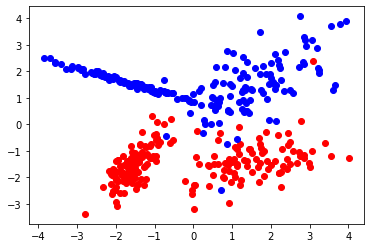

In [10]:
# Affiche les données d'entrainement
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], c="red")
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c="blue")

Nous allons créer une classe qui contient toutes les fonctions dont nous avons besoin.

- Implémentez les méthodes dans l'ordre, mais je conseille de ne pas directement compléter le code : tester d'abord en prototypant rapidement, comme je l'ai fait pour l'algo du plus proche voisin, et une fois qu'une fonction a l'air de marcher, vous l'incluez dans le code de la classe et passez à la fonction méthodes suivante 
- Pour la fonction pred_batch, ne faite pas de boucle!
- Quand vous prototypez, pensez bien à la question des dimensions, affichez les dimensions de vos tenseurs entre les opérations, etc.
- Pour la fonction fit, écrivez d'abord l'entrainement qui enregistre simplement les paramêtres de la dernières epoch. Une fois que ça marche, modifiez pour enregistrer les paramêtres qui ont obtenus les meilleurs résultats sur le dev

In [69]:
class BinaryPerceptron:
    def __init__(self, feature_size):
        self.feature_size = feature_size
        self.a = np.array([0,0])
        self.b = 0
        self.best_a = np.array([0,0])
        self.best_b = 0
        
    # predicting the output for a single datapoint
    def pred(self, x):
        if len(x.shape) != 1:
            raise RuntimeError("1D tensor expected!")
        x_array = np.array(x)
        pred = x_array @ self.a + self.b
        
        return (pred>=0)*2-1
    
    # predict the outout for a batch of datapoints
    # shape of input X: (n datapoints, feature_size)
    # shape of output Y: (n datapoints, )
    def pred_batch(self, X):
        if len(X.shape) != 2 or X.shape[1] != self.feature_size:
            raise RuntimeError("Invalid input shape")
            
        Y_pred = []
        for i in range(len(X)):
            pred = self.pred(X[i])
            Y_pred.append(pred)
        
        return Y_pred
    
    # compute the accuracy of the model
    # shape of input X: (n datapoints, feature_size)
    # shape of input Y_gold: (n datapoints,)
    # output type: scalar
    def accuracy(self, X, Y_gold):
        somme = 0
        for i in range(len(Y_gold)):
            if self.pred(X[i]) == Y_gold[i]:
                somme+=1
        acc = somme/len(Y_gold)
        return acc
        
    # Entraine le modèle en utilisant les données en entrée
    # Attention:
    # - il faut commencez par réinitialiser les données!
    # - retournez dans acc l'accuracy du modèle à chaque époch: qu'observez vous?
    def fit(self, X_train, Y_train, X_dev, Y_dev, n_epoch=10):
        self.a = self.best_a.copy()
        self.b = self.best_b
        accs = list()
        accs.append(-math.inf)
        for iteration in range(n_epoch):
            Y_pred = self.pred_batch(X_train)
            for i in range(len(Y_pred)):
                yi = Y_train[i]
                xi = X_train[i]
                if Y_pred[i] != yi :
                    self.a = self.a + yi*xi
                    #print(self.a)
                    self.b = self.b + yi
            dev_acc = self.accuracy(X_dev, Y_dev)
            print(max(accs))
            if dev_acc > max(accs):
                self.best_a = self.a.copy()
                self.best_b = self.b
                best_acc = dev_acc
            accs.append(dev_acc)
        
        return accs

In [70]:
perceptron = BinaryPerceptron(2)
accs = perceptron.fit(X_train, Y_train, X_dev, Y_dev)
print(perceptron.best_b)
print(perceptron.a)

-inf
0.94
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
-177
[ 46.53956689 236.04859833]


In [72]:
a = perceptron.best_a
b = perceptron.best_b

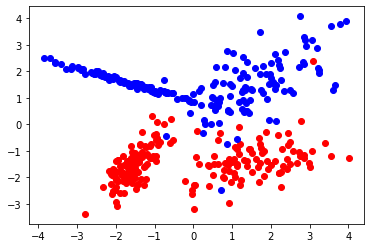

In [71]:
# Affiche les données d'entrainement
liste = range(1000)
X = [liste[i]*a[1]+b for i in ]
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], c="red")
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c="blue")
plt.scatter()

In [57]:
accs

[-inf, 0.94, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]

## Perceptron multiclasse

On va maintenant développer un perceptron multiclasse, c'est-à-dire qu'on doit prédire une classe parmi k.
On va générer encore une fois des données artificielles. Vous pouvez modifier la valeur de class_sep dans la génération pour rendre le problème plus facile.

In [ ]:
# génération des données pour le perceptron multiclasse
n_train = 400
n_dev = 100
n_test = 100

X, Y = sklearn.datasets.make_classification(
    n_samples=n_train + n_dev + n_test,
    n_features=10,
    n_informative=9,
    n_redundant=0,
    n_classes=5,
    # to make the problem easier,
    # you can change the value here to 2 or even higher value
    class_sep=1.5
)

# split dataset
X_train = X[:n_train]
Y_train = Y[:n_train]
X_dev = X[n_train:n_train+n_dev]
Y_dev = Y[n_train:n_train+n_dev]
X_test = X[n_train+n_dev:]
Y_test = Y[n_train+n_dev:]

len(Y_train), len(Y_dev), len(Y_test)

Et le code!

Faite bien attention aux dimensions ! N'oubliez pas d'utiliser le broadcasting.

In [ ]:
A = np.random.rand(2, 4)
B = np.random.rand(10, 4)
C = A[None, :, :] @ B[:, :, None]
print(C.shape)
C = C.squeeze(2)
print(C.shape)

In [ ]:
class MulticlassPerceptron:
    def __init__(self, n_classes, feature_size):
        # TODO TODO
        
    def pred(self, x):
        if len(x.shape) != 1:
            raise RuntimeError()
            
        # TODO TODO
        
        return pred
    
    def pred_batch(self, X):
        # TODO TODO
        
        return pred
    
    def accuracy(self, X, Y):
        # TODO TODO
        
        return acc
        
    def fit(self, X_train, Y_train, X_dev, Y_dev, n_epoch=100):
        accs = list()
        
        # TODO TODO
        
        return accs

In [ ]:
# TODO: tester le modèle